We will be analyzing restaurant data from the different restaurants we specified in Progress Report #1.

In [1]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/aimeeoh/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/aimeeoh/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/aimeeoh/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/aimeeoh/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /Users/aimeeoh/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading pa

True

In [2]:
data = pd.read_csv('data/restaurant-skirt-steak-n-y-c/csv/detailed-reviews-of-restaurant-skirt-steak-n-y-c.csv')

df = data[['place_name', 'rating', 'review_text', 'published_at_date']]
df

,place_name,rating,review_text,published_at_date
0,Skirt Steak,5,The food was very good! Pre fixed menu with a ...,2024-02-28 11:28:52.817598
1,Skirt Steak,2,Place is too packed and overrated when I went ...,2024-02-27 11:28:52.830056
2,Skirt Steak,5,NaN,2024-02-27 11:28:52.834193
3,Skirt Steak,5,We went on a Saturday without a reservation an...,2024-02-27 11:28:52.841864
4,Skirt Steak,5,NaN,2024-02-26 11:28:52.846040
...,...,...,...,...
1149,Skirt Steak,5,Wonderful concept! Prompt service and the fri...,2022-03-02 11:31:39.231024
1150,Skirt Steak,5,AMAZING! Food and service were perfect. The st...,2022-03-02 11:31:40.216960
1151,Skirt Steak,5,"We went on their second day open, and they wer...",2022-03-02 11:31:40.222027
1152,Skirt Steak,5,Skirt Steak is unbelievably good. Unlimited ha...,2022-03-02 11:31:40.224715


Extracting Year from 'published_at_date' column

In [3]:
df['published_at_date'] = pd.to_datetime(df['published_at_date']).dt.year
df

/var/folders/h6/vygxj7rj5tq9z54ggx6zd6080000gn/T/ipykernel_16437/2592446673.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['published_at_date'] = pd.to_datetime(df['published_at_date']).dt.year


,place_name,rating,review_text,published_at_date
0,Skirt Steak,5,The food was very good! Pre fixed menu with a ...,2024
1,Skirt Steak,2,Place is too packed and overrated when I went ...,2024
2,Skirt Steak,5,NaN,2024
3,Skirt Steak,5,We went on a Saturday without a reservation an...,2024
4,Skirt Steak,5,NaN,2024
...,...,...,...,...
1149,Skirt Steak,5,Wonderful concept! Prompt service and the fri...,2022
1150,Skirt Steak,5,AMAZING! Food and service were perfect. The st...,2022
1151,Skirt Steak,5,"We went on their second day open, and they wer...",2022
1152,Skirt Steak,5,Skirt Steak is unbelievably good. Unlimited ha...,2022


Charts for ratings

<AxesSubplot: >

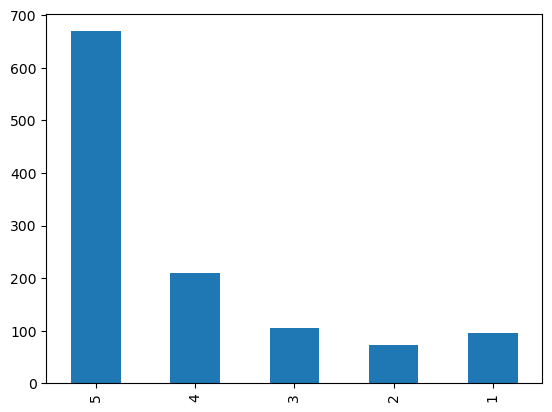

In [4]:
df['rating'].value_counts()[[5, 4, 3, 2, 1]].plot(kind='bar')

<AxesSubplot: title={'center': 'Restaurant Ratings'}, ylabel='rating'>

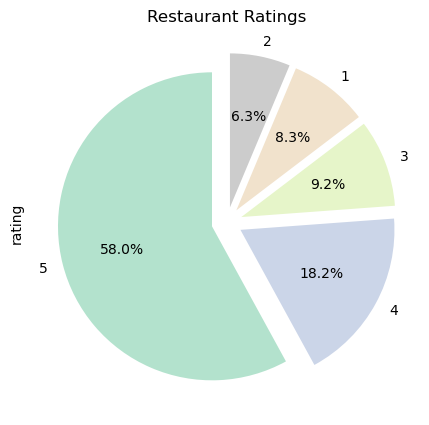

In [5]:
kwargs = dict(
    startangle = 90,
    colormap   = 'Pastel2',
    fontsize   = 10,
    explode    = (0.1,0.1,0.1,0.1,0.1),
    figsize    = (60,5),
    autopct    = '%1.1f%%',
    title      = 'Restaurant Ratings'
)

df['rating'].value_counts().plot.pie(**kwargs)

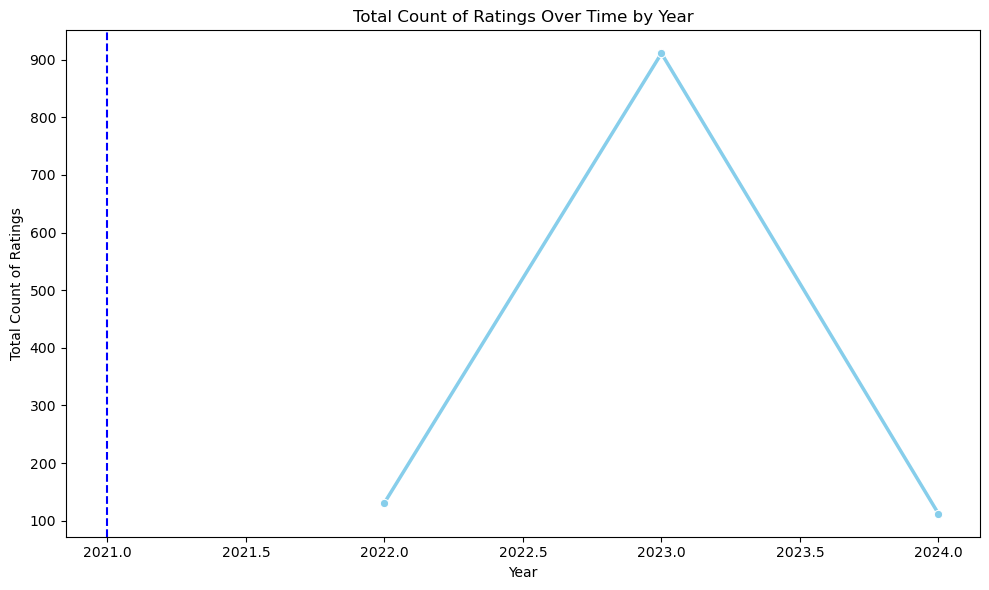

In [6]:
rating_counts = df.groupby(['published_at_date', 'rating']).size().unstack(fill_value=0)

total_ratings_per_year = rating_counts.sum(axis=1)

plt.figure(figsize=(10, 6))
sns.lineplot(data=total_ratings_per_year, marker='o', color='skyblue', linewidth=2.5)
plt.axvline(x=2021, color='blue', linestyle='--', label='Year 2021')


plt.title('Total Count of Ratings Over Time by Year')
plt.xlabel('Year')
plt.ylabel('Total Count of Ratings')
plt.tight_layout()
plt.show()

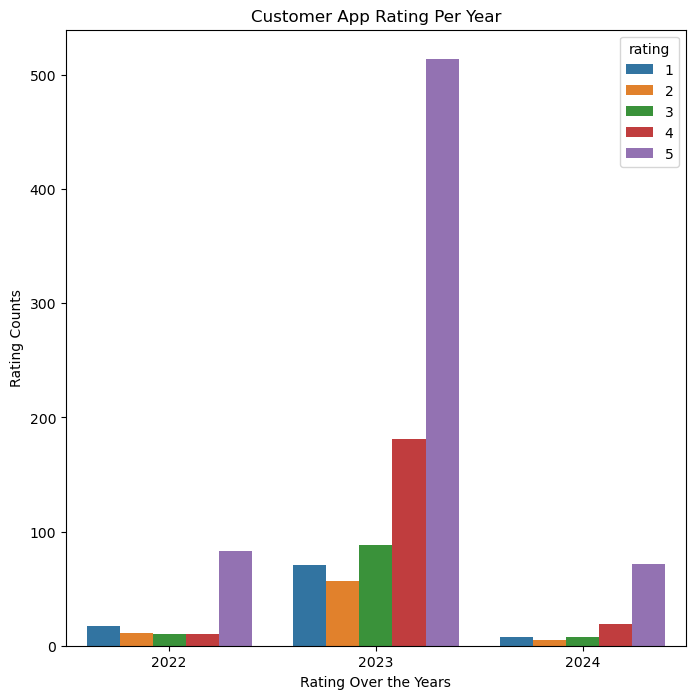

In [7]:
plt.figure(figsize=(8, 8))
sns.countplot(x = 'published_at_date', hue ='rating', data = df)
plt.title('Customer App Rating Per Year')
plt.xlabel("Rating Over the Years")
plt.ylabel('Rating Counts')
plt.show()

In [8]:
df['review_text'] = df['review_text'].astype("string")

df[['review_text']]

/var/folders/h6/vygxj7rj5tq9z54ggx6zd6080000gn/T/ipykernel_16437/2693296585.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_text'] = df['review_text'].astype("string")


,review_text
0,The food was very good! Pre fixed menu with a ...
1,Place is too packed and overrated when I went ...
2,<NA>
3,We went on a Saturday without a reservation an...
4,<NA>
...,...
1149,Wonderful concept! Prompt service and the fri...
1150,AMAZING! Food and service were perfect. The st...
1151,"We went on their second day open, and they wer..."
1152,Skirt Steak is unbelievably good. Unlimited ha...


In [9]:
import re
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer
stop_words_file = 'Stopwords.txt'

stop_words = []

with open(stop_words_file, "r") as f:
    for line in f:
        stop_words.extend(line.split()) 
        
stop_words = stop_words  

def preprocess(raw_text):
    
    #regular expression keeping only letters 
    letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)

    # convert to lower case and split into words -> convert string into list ( 'hello world' -> ['hello', 'world'])
    words = letters_only_text.lower().split()

    cleaned_words = []
    lemmatizer = PorterStemmer() #plug in here any other stemmer or lemmatiser you want to try out
    
    # remove stopwords
    for word in words:
        if word not in stop_words:
            cleaned_words.append(word)
    
    # stemm or lemmatise words
    stemmed_words = []
    for word in cleaned_words:
        word = lemmatizer.stem(word)   #dont forget to change stem to lemmatize if you are using a lemmatizer
        stemmed_words.append(word)
    
    # converting list back to string
    return " ".join(stemmed_words)

In [10]:
test_sentence = "Service was excellent, food was delicious, and vibe was great ! We got the korean style boneless fried chicken (sweet chili sauce was fire), veg buckwheat pancake, and spicy chicken. Our server was so kind and attentive & we had a great experience; the sweet treat cookie at end was so cute :)"

preprocess(test_sentence)

'servic excel food delici vibe great korean style boneless fri chicken sweet chili sauc fire veg buckwheat pancak spici chicken server kind attent great experi sweet treat cooki end cute'

In [11]:
prep = []

for text in df['review_text']:
    if pd.isna(text):
        prep.append('')
    else:
        prep.append(preprocess(text))

df['prep'] = prep

df.head()

/var/folders/h6/vygxj7rj5tq9z54ggx6zd6080000gn/T/ipykernel_16437/1628437642.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prep'] = prep


,place_name,rating,review_text,published_at_date,prep
0,Skirt Steak,5,The food was very good! Pre fixed menu with a ...,2024,food good pre fix menu tasti salad steak unlim...
1,Skirt Steak,2,Place is too packed and overrated when I went ...,2024,place pack overr steak alright unlimit fri cat...
2,Skirt Steak,5,<NA>,2024,
3,Skirt Steak,5,We went on a Saturday without a reservation an...,2024,saturday reserv stood line wasnt big deal felt...
4,Skirt Steak,5,<NA>,2024,


In [12]:
from collections import Counter
Counter(" ".join(df["prep"]).split()).most_common(50)

[('steak', 835),
 ('fri', 605),
 ('good', 417),
 ('food', 319),
 ('salad', 319),
 ('great', 317),
 ('wait', 284),
 ('place', 248),
 ('servic', 217),
 ('skirt', 211),
 ('line', 199),
 ('delici', 174),
 ('dessert', 172),
 ('menu', 171),
 ('unlimit', 157),
 ('restaur', 151),
 ('worth', 148),
 ('bread', 147),
 ('price', 147),
 ('order', 143),
 ('time', 141),
 ('nice', 133),
 ('recommend', 122),
 ('cook', 122),
 ('side', 122),
 ('staff', 115),
 ('tabl', 113),
 ('drink', 107),
 ('amaz', 107),
 ('meat', 103),
 ('medium', 102),
 ('serv', 99),
 ('experi', 98),
 ('love', 96),
 ('sauc', 89),
 ('back', 88),
 ('garlic', 87),
 ('meal', 85),
 ('simpl', 81),
 ('seat', 80),
 ('long', 80),
 ('eat', 79),
 ('friendli', 78),
 ('hour', 78),
 ('excel', 78),
 ('rare', 74),
 ('tast', 73),
 ('peopl', 72),
 ('perfect', 70),
 ('option', 69)]

In [13]:
def create_sentiment(rating):
    
    if rating==1 or rating==2:
        return -1 # negative sentiment
    elif rating==4 or rating==5:
        return 1 # positive sentiment
    else:
        return 0 # neutral sentiment

df['sentiment'] = df['rating'].apply(create_sentiment)
df

/var/folders/h6/vygxj7rj5tq9z54ggx6zd6080000gn/T/ipykernel_16437/1400198503.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['rating'].apply(create_sentiment)


,place_name,rating,review_text,published_at_date,prep,sentiment
0,Skirt Steak,5,The food was very good! Pre fixed menu with a ...,2024,food good pre fix menu tasti salad steak unlim...,1
1,Skirt Steak,2,Place is too packed and overrated when I went ...,2024,place pack overr steak alright unlimit fri cat...,-1
2,Skirt Steak,5,<NA>,2024,,1
3,Skirt Steak,5,We went on a Saturday without a reservation an...,2024,saturday reserv stood line wasnt big deal felt...,1
4,Skirt Steak,5,<NA>,2024,,1
...,...,...,...,...,...,...
1149,Skirt Steak,5,Wonderful concept! Prompt service and the fri...,2022,wonder concept prompt servic fri hot crisp ste...,1
1150,Skirt Steak,5,AMAZING! Food and service were perfect. The st...,2022,amaz food servic perfect steak tender savouri ...,1
1151,Skirt Steak,5,"We went on their second day open, and they wer...",2022,day open great start warm bread sizabl salad u...,1
1152,Skirt Steak,5,Skirt Steak is unbelievably good. Unlimited ha...,2022,skirt steak unbeliev good unlimit hand cut hou...,1


<AxesSubplot: xlabel='sentiment', ylabel='count'>

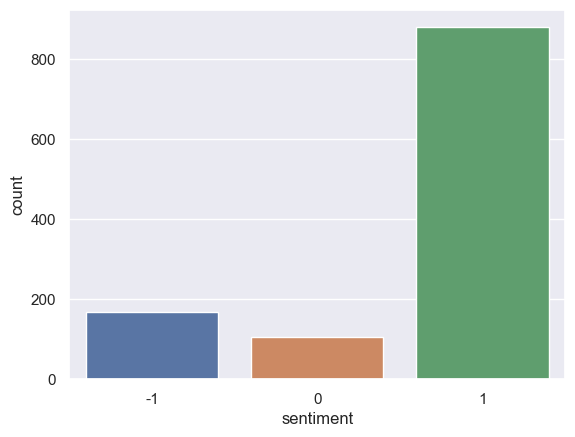

In [14]:
sns.set_theme()

# Create a visualization
sns.countplot(
    data=df,
    x="sentiment"
)

In [15]:
# initialize NLTK sentiment analyzer

analyzer = SentimentIntensityAnalyzer()


# create get_sentiment function

def get_sentiment(text):

    scores = analyzer.polarity_scores(text)

    sentiment = 1 if scores['pos'] > 0 else 0

    return scores['compound']




# apply get_sentiment function

df['review_sentiment'] = df['prep'].apply(get_sentiment)

df['review_sentiment']

/var/folders/h6/vygxj7rj5tq9z54ggx6zd6080000gn/T/ipykernel_16437/3818571148.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_sentiment'] = df['prep'].apply(get_sentiment)


0       0.8074
1       0.2500
2       0.0000
3       0.9565
4       0.0000
         ...  
1149    0.0000
1150    0.5719
1151    0.9260
1152    0.9169
1153    0.9260
Name: review_sentiment, Length: 1154, dtype: float64

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(strip_accents=None, 
                        lowercase=False,
                        preprocessor=None)

X = tfidf.fit_transform(df['prep'])

from sklearn.model_selection import train_test_split
y = df['sentiment'] # target variable
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [17]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train,y_train) # fit the model
preds = lr.predict(X_test) # make predictions

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(preds,y_test)

0.7612456747404844

<AxesSubplot: xlabel='published_at_date', ylabel='review_sentiment'>

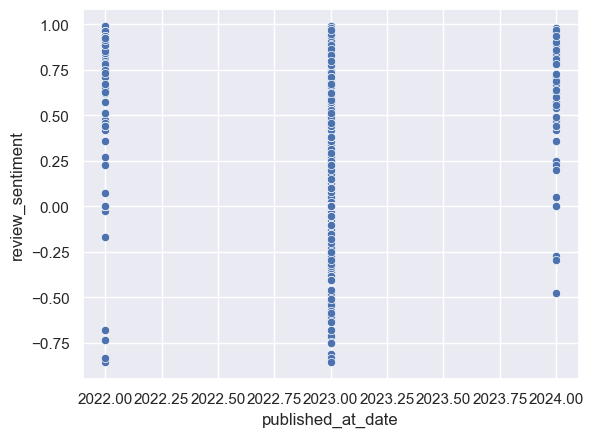

In [19]:
sns.scatterplot(data=df, x='published_at_date', y='review_sentiment')

<AxesSubplot: xlabel='published_at_date', ylabel='review_sentiment'>

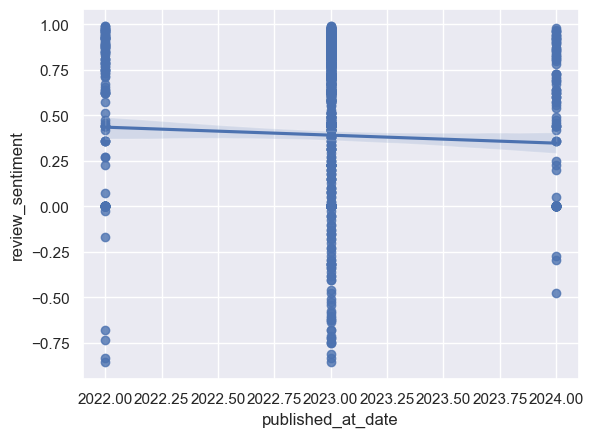

In [20]:
sns.regplot(x="published_at_date", y="review_sentiment", data=df)

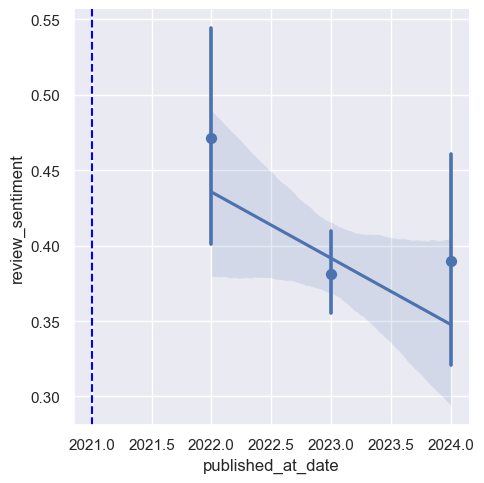

In [21]:
sns.lmplot(x="published_at_date", y="review_sentiment", data=df, x_estimator=np.mean)
plt.axvline(x=2021, color='blue', linestyle='--', label='Year 2021')

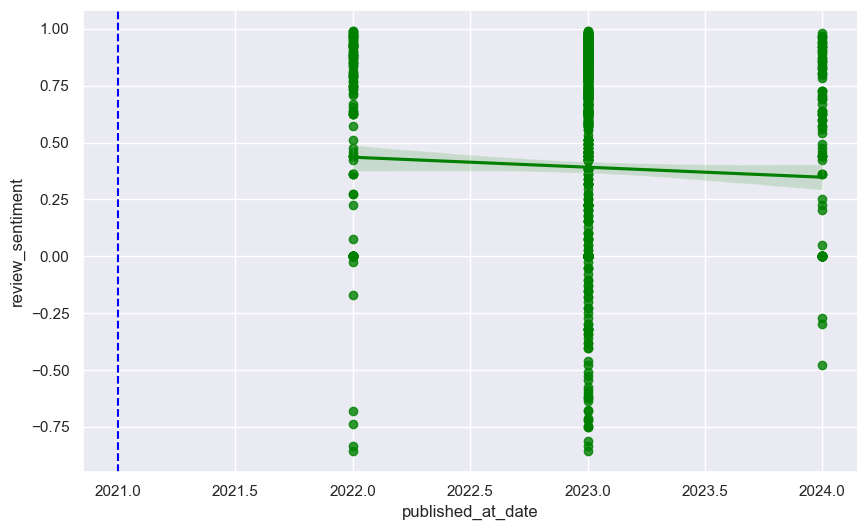

In [22]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='published_at_date', y='review_sentiment', marker='o', color='green')
plt.axvline(x=2021, color='blue', linestyle='--', label='Year 2021')

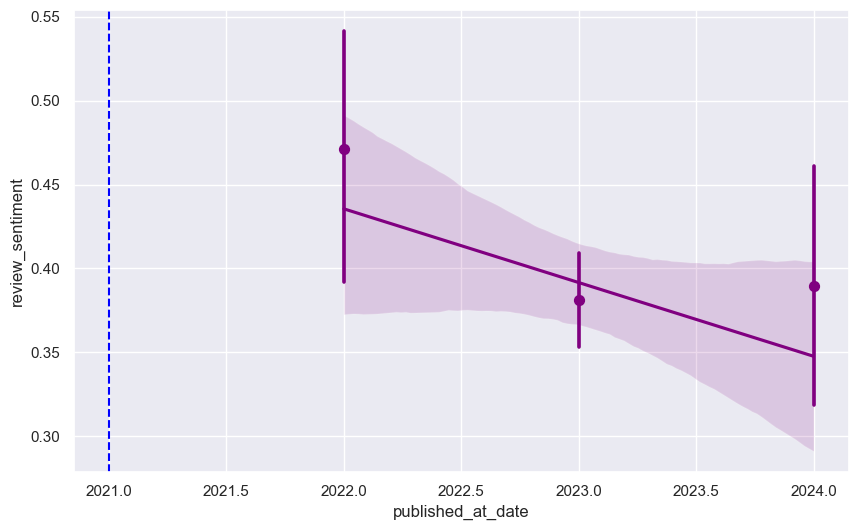

In [23]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='published_at_date', y='review_sentiment', marker='o', color='purple', x_estimator=np.mean)
plt.axvline(x=2021, color='blue', linestyle='--', label='Year 2021')

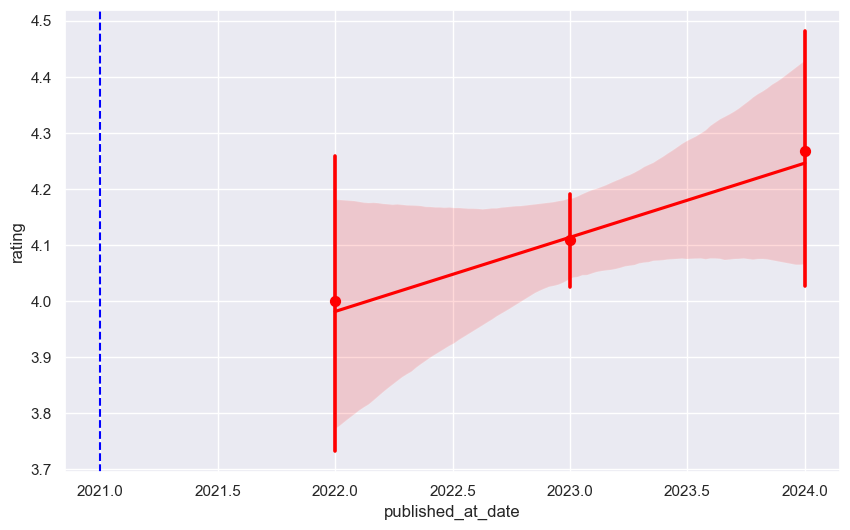

In [24]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='published_at_date', y='rating', marker='o', color='red', x_estimator=np.mean)
plt.axvline(x=2021, color='blue', linestyle='--', label='Year 2021')

In [25]:
# make altered data into csv file
df.to_csv('altdata/' + 'skirtsteak.csv', index=False)